In [19]:
import pandas as pd
import numpy as np
import env
import wrangle_zillow
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats


In [5]:
url = env.get_database('zillow')

query = '''
select *, airconditioningdesc, architecturalstyledesc, buildingclassdesc, heatingorsystemdesc, logerror, transactiondate, propertylandusedesc, storydesc, typeconstructiondesc
from properties_2017
left join airconditioningtype using(airconditioningtypeid)
left join heatingorsystemtype using(heatingorsystemtypeid)
left join architecturalstyletype using(architecturalstyletypeid)
left join buildingclasstype using(buildingclasstypeid)
join predictions_2017 using(parcelid)
left join propertylandusetype using(propertylandusetypeid)
left join storytype using(storytypeid)
left join typeconstructiontype using(typeconstructiontypeid);'''

In [6]:
zillow = wrangle_zillow.get_zillow_data(query)

In [7]:
zillow1 = wrangle_zillow.nulvals(zillow)

In [8]:
zillow = wrangle_zillow.drops(zillow, 0.5, 0.5)

In [9]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77575 entries, 0 to 77613
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77575 non-null  int64  
 1   propertylandusetypeid         77541 non-null  float64
 2   parcelid                      77575 non-null  int64  
 3   heatingorsystemtypeid         49549 non-null  float64
 4   id                            77575 non-null  int64  
 5   bathroomcnt                   77541 non-null  float64
 6   bedroomcnt                    77541 non-null  float64
 7   buildingqualitytypeid         49788 non-null  float64
 8   calculatedbathnbr             76925 non-null  float64
 9   calculatedfinishedsquarefeet  77340 non-null  float64
 10  finishedsquarefeet12          73885 non-null  float64
 11  fips                          77541 non-null  float64
 12  fullbathcnt                   76925 non-null  float64
 13  l

In [10]:
zillow['regionidcity']

0         53571.0
3        396551.0
4         12447.0
7         45457.0
9         12447.0
           ...   
77609     12447.0
77610     27110.0
77611     36502.0
77612     14634.0
77613    118217.0
Name: regionidcity, Length: 77575, dtype: float64

In [11]:
zillow = zillow.drop(columns = ['propertylandusetypeid', \
                                'heatingorsystemtypeid','buildingqualitytypeid', \
                                'finishedsquarefeet12', 'lotsizesquarefeet', \
                                'propertycountylandusecode', 'structuretaxvaluedollarcnt', \
                                'landtaxvaluedollarcnt', 'taxamount'])

In [12]:
zillow = zillow.T.drop_duplicates().T

In [13]:
zillow.head()

,Unnamed: 0,parcelid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,roomcnt,unitcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,censustractandblock,heatingorsystemdesc,logerror,transactiondate,propertylandusedesc
0,0,14297519,1727539,3.5,4.0,3.5,3100.0,6059.0,3.0,33634931.0,...,0.0,NaN,1998.0,1023282.0,2016.0,60590630072012.0,NaN,0.025595,2017-01-01,Single Family Residential
3,3,12177905,2288172,3.0,4.0,3.0,2376.0,6037.0,3.0,34245180.0,...,0.0,1.0,1970.0,145143.0,2016.0,60373001001006.0,Central,-0.10341,2017-01-01,Single Family Residential
4,4,10887214,1970746,3.0,3.0,3.0,1312.0,6037.0,3.0,34185120.0,...,0.0,1.0,1964.0,119407.0,2016.0,60371236012000.0,Central,0.00694,2017-01-01,Condominium
7,7,12069064,870991,1.0,2.0,1.0,738.0,6037.0,1.0,34149214.0,...,0.0,1.0,1922.0,218552.0,2016.0,60373020041001.0,NaN,0.101723,2017-01-01,Single Family Residential
9,9,11542646,1585097,3.0,2.0,3.0,1290.0,6037.0,3.0,33998800.0,...,0.0,1.0,1980.0,371361.0,2016.0,60372751022006.0,Central,-0.036763,2017-01-02,Condominium


In [14]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77575 entries, 0 to 77613
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    77575 non-null  object
 1   parcelid                      77575 non-null  object
 2   id                            77575 non-null  object
 3   bathroomcnt                   77541 non-null  object
 4   bedroomcnt                    77541 non-null  object
 5   calculatedbathnbr             76925 non-null  object
 6   calculatedfinishedsquarefeet  77340 non-null  object
 7   fips                          77541 non-null  object
 8   fullbathcnt                   76925 non-null  object
 9   latitude                      77541 non-null  object
 10  longitude                     77541 non-null  object
 11  propertyzoningdesc            50453 non-null  object
 12  rawcensustractandblock        77541 non-null  object
 13  regionidcity    

# Questions of the Data:
* What is the shape of the distribution of log error?
* Is there a relationship between log error and tax value?
* Does region city ID and log error have a relationship?
* Does log error differ accross room count?
* Does log error differ accross propertylandusedesc?

## What is the distribution of the log error?

(-1.0, 1.0)

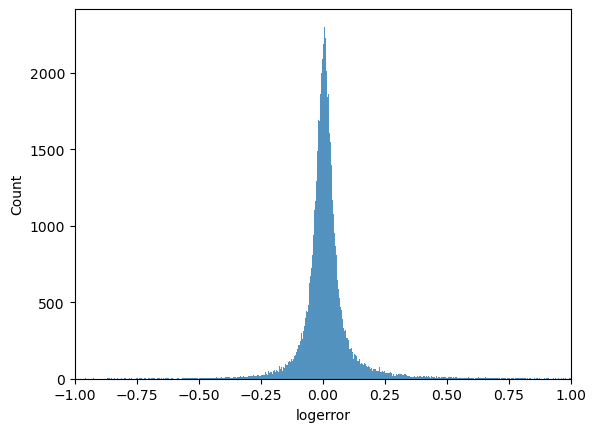

In [15]:
sns.histplot(zillow['logerror'])
plt.xlim(-1,1)

In [16]:
zillow['abs_logerror'] = abs(zillow['logerror'])

the distribution appears to be normal

## Is there a relationship between absolute value of log error and tax value?

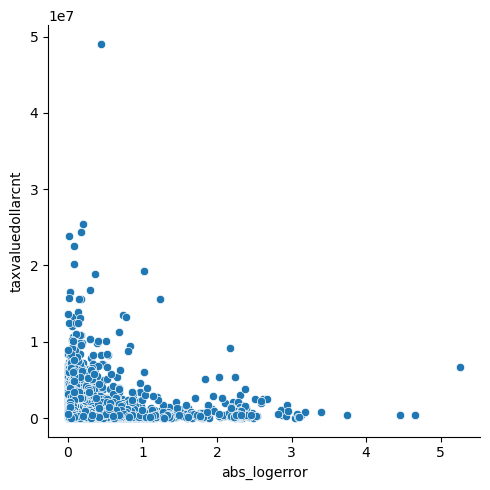

In [17]:
sns.relplot(data = zillow, x = zillow['abs_logerror'], y = zillow['taxvaluedollarcnt'])





no, there doesnt appear to be a relationship, but lets test it out:

Ho: there is no relationship between absolute value of log error and tax value

Ha: there is a relationship between absolute value of log error and tax value

In [39]:
zillow.dropna(how = 'any', subset = 'taxvaluedollarcnt', inplace = True)

In [40]:
zillow['taxvaluedollarcnt'].dropna(how = 'any', inplace = True)

In [41]:
zillow['taxvaluedollarcnt'].isnull().sum()


0

In [42]:
r, p = stats.pearsonr(zillow['abs_logerror'], zillow['taxvaluedollarcnt'])
r, p

(0.057082831425625105, 5.576391299107231e-57)

according to our statistical pearsonr test, we would reject the null hypothesis and say that there is a very weak positive correlation between the two variables.

## Does region city ID and log error have a relationship?

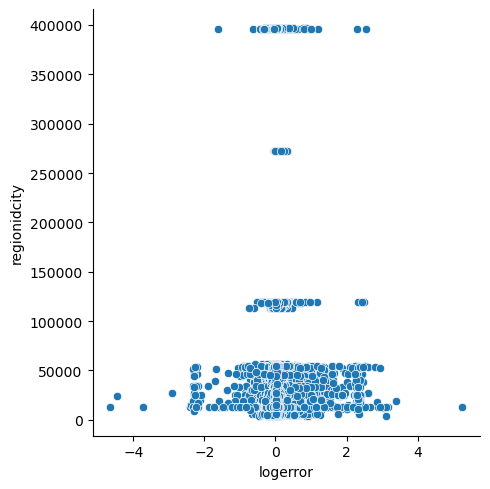

In [15]:
sns.relplot(data = zillow, x = zillow['logerror'], y = zillow['regionidcity'])

## Does absolute value of log error differ accross room count?

In [51]:
zillow.loc[zillow.bedroomcnt == 7, 'bedroomcnt'].count()

208

In [59]:
one = zillow[zillow['bedroomcnt'] == 1]
two = zillow[zillow['bedroomcnt'] == 2]
three = zillow[zillow['bedroomcnt'] == 3]
four = zillow[zillow['bedroomcnt'] == 4]
five = zillow[zillow['bedroomcnt'] == 5]
sixplus = zillow[zillow['bedroomcnt'] >= 6]

(0.0, 0.4)

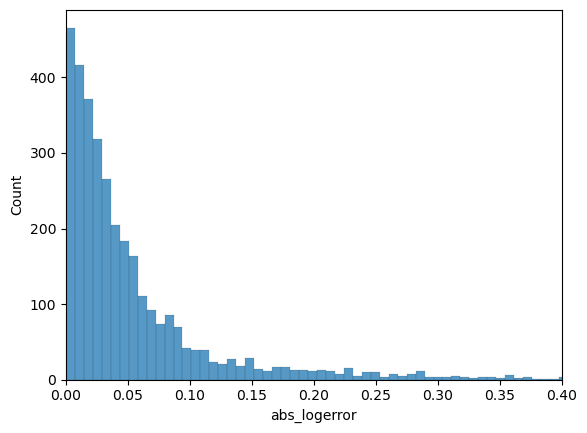

In [66]:
sns.histplot(one['abs_logerror'])
plt.xlim(0,0.4)



(0.0, 0.4)

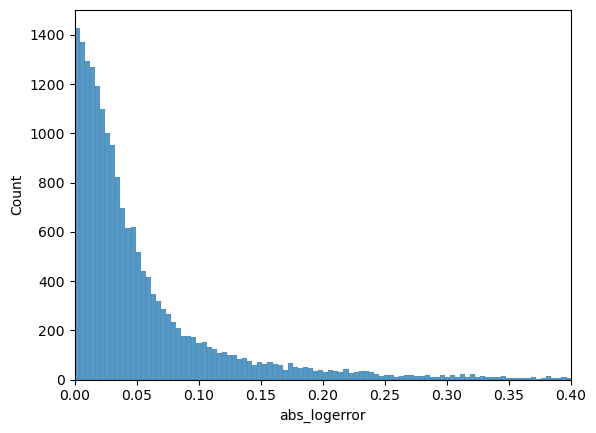

In [67]:
sns.histplot(two['abs_logerror'])
plt.xlim(0,0.4)


(0.0, 0.4)

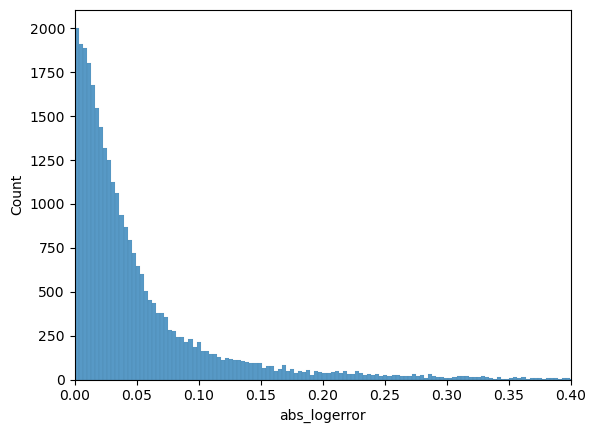

In [68]:

sns.histplot(three['abs_logerror'])
plt.xlim(0,0.4)


(0.0, 0.4)

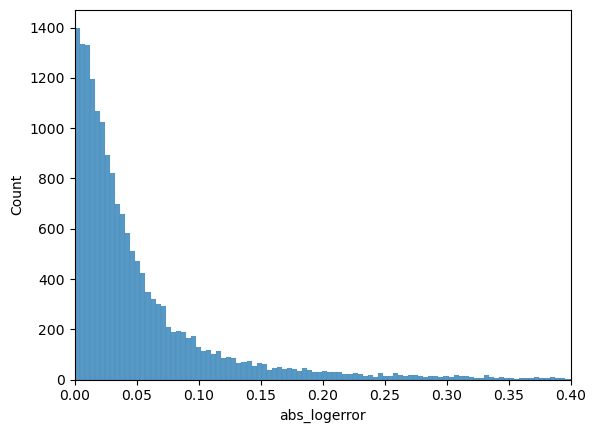

In [69]:

sns.histplot(four['abs_logerror'])
plt.xlim(0,0.4)


(0.0, 0.4)

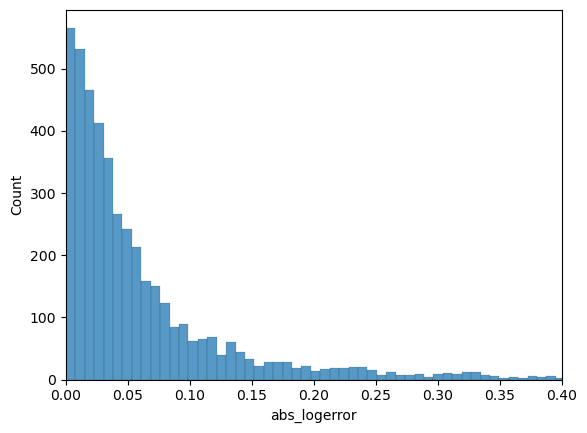

In [70]:

sns.histplot(five['abs_logerror'])
plt.xlim(0,0.4)

it appears to have no impact on log error.